In [2]:
# Import the ParFlow package
#
from parflow import Run
import os
import shutil
from parflow.tools.fs import mkdir, cp, chdir, get_absolute_path, rm, exists

print(os.getcwd())
relative_path_to_runfolder = 'output'
base = get_absolute_path(relative_path_to_runfolder)
print(base)

# copy CLM files
cp('inputs/drv_clmin.dat', 'output/drv_clmin.dat')
cp('inputs/drv_vegm.dat', 'output/drv_vegm.dat')
cp('inputs/drv_vegp.dat', 'output/drv_vegp.dat')


# Set our Run Name 
PFCLM_SC = Run("PFCLM_SC")


stopt = 8760

#-----------------------------------------------------------------------------
# File input version number
#-----------------------------------------------------------------------------
PFCLM_SC.FileVersion = 4

#-----------------------------------------------------------------------------
# Process Topology
#-----------------------------------------------------------------------------

PFCLM_SC.Process.Topology.P = 1
PFCLM_SC.Process.Topology.Q = 1
PFCLM_SC.Process.Topology.R = 1

#-----------------------------------------------------------------------------
# Computational Grid
#-----------------------------------------------------------------------------
PFCLM_SC.ComputationalGrid.Lower.X = 0.0
PFCLM_SC.ComputationalGrid.Lower.Y = 0.0
PFCLM_SC.ComputationalGrid.Lower.Z = 0.0

PFCLM_SC.ComputationalGrid.DX      = 2.0
PFCLM_SC.ComputationalGrid.DY      = 2.0
PFCLM_SC.ComputationalGrid.DZ      = 0.1

PFCLM_SC.ComputationalGrid.NX      = 1
PFCLM_SC.ComputationalGrid.NY      = 1
PFCLM_SC.ComputationalGrid.NZ      = 20

#-----------------------------------------------------------------------------
# The Names of the GeomInputs
#-----------------------------------------------------------------------------
PFCLM_SC.GeomInput.Names = 'domain_input'

#-----------------------------------------------------------------------------
# Domain Geometry Input
#-----------------------------------------------------------------------------
PFCLM_SC.GeomInput.domain_input.InputType = 'Box'
PFCLM_SC.GeomInput.domain_input.GeomName  = 'domain'

#-----------------------------------------------------------------------------
# Domain Geometry
#-----------------------------------------------------------------------------
PFCLM_SC.Geom.domain.Lower.X = 0.0
PFCLM_SC.Geom.domain.Lower.Y = 0.0
PFCLM_SC.Geom.domain.Lower.Z = 0.0

PFCLM_SC.Geom.domain.Upper.X = 2.0
PFCLM_SC.Geom.domain.Upper.Y = 2.0
PFCLM_SC.Geom.domain.Upper.Z = 2.0

PFCLM_SC.Geom.domain.Patches = 'x_lower x_upper y_lower y_upper z_lower z_upper'


#--------------------------------------------
# variable dz assignments
#------------------------------------------

PFCLM_SC.Solver.Nonlinear.VariableDz = True
PFCLM_SC.dzScale.GeomNames           = 'domain'
PFCLM_SC.dzScale.Type                = 'nzList'
PFCLM_SC.dzScale.nzListNumber        = 20

# cells start at the bottom (0) and moves up to the top
# domain is 3.21 m thick, root zone is down to 19 cells 
# so the root zone is 2.21 m thick
PFCLM_SC.Cell._0.dzScale.Value  = 10.0   # first cell is 10*0.1 1m thick
PFCLM_SC.Cell._1.dzScale.Value  = 5.0    # next cell is 5*0.1 50 cm thick
PFCLM_SC.Cell._2.dzScale.Value  = 1.0   
PFCLM_SC.Cell._3.dzScale.Value  = 1.0
PFCLM_SC.Cell._4.dzScale.Value  = 1.0
PFCLM_SC.Cell._5.dzScale.Value  = 1.0
PFCLM_SC.Cell._6.dzScale.Value  = 1.0
PFCLM_SC.Cell._7.dzScale.Value  = 1.0
PFCLM_SC.Cell._8.dzScale.Value  = 1.0
PFCLM_SC.Cell._9.dzScale.Value  = 1.0
PFCLM_SC.Cell._10.dzScale.Value = 1.0
PFCLM_SC.Cell._11.dzScale.Value = 1.0
PFCLM_SC.Cell._12.dzScale.Value = 1.0
PFCLM_SC.Cell._13.dzScale.Value = 1.0
PFCLM_SC.Cell._14.dzScale.Value = 1.0
PFCLM_SC.Cell._15.dzScale.Value = 1.0
PFCLM_SC.Cell._16.dzScale.Value = 1.0
PFCLM_SC.Cell._17.dzScale.Value = 1.0
PFCLM_SC.Cell._18.dzScale.Value = 1.0
PFCLM_SC.Cell._19.dzScale.Value = 0.1   #0.1* 0.1 = 0.01  1 cm top layer

#-----------------------------------------------------------------------------
# Perm
#-----------------------------------------------------------------------------
PFCLM_SC.Geom.Perm.Names              = 'domain'
PFCLM_SC.Geom.domain.Perm.Type        = 'Constant'
PFCLM_SC.Geom.domain.Perm.Value       = 0.001465
PFCLM_SC.Perm.TensorType              = 'TensorByGeom'
PFCLM_SC.Geom.Perm.TensorByGeom.Names = 'domain'
PFCLM_SC.Geom.domain.Perm.TensorValX  = 1.0
PFCLM_SC.Geom.domain.Perm.TensorValY  = 1.0
PFCLM_SC.Geom.domain.Perm.TensorValZ  = 1.0

#-----------------------------------------------------------------------------
# Specific Storage
#-----------------------------------------------------------------------------

PFCLM_SC.SpecificStorage.Type              = 'Constant'
PFCLM_SC.SpecificStorage.GeomNames         = 'domain'
PFCLM_SC.Geom.domain.SpecificStorage.Value = 1.0e-4

#-----------------------------------------------------------------------------
# Phases
#-----------------------------------------------------------------------------

PFCLM_SC.Phase.Names = 'water'

PFCLM_SC.Phase.water.Density.Type     = 'Constant'
PFCLM_SC.Phase.water.Density.Value    = 1.0

PFCLM_SC.Phase.water.Viscosity.Type   = 'Constant'
PFCLM_SC.Phase.water.Viscosity.Value  = 1.0

#-----------------------------------------------------------------------------
# Contaminants
#-----------------------------------------------------------------------------
PFCLM_SC.Contaminants.Names = ''


#-----------------------------------------------------------------------------
# Gravity
#-----------------------------------------------------------------------------

PFCLM_SC.Gravity = 1.0

#-----------------------------------------------------------------------------
# Setup timing info
#-----------------------------------------------------------------------------

PFCLM_SC.TimingInfo.BaseUnit     = 1.0
PFCLM_SC.TimingInfo.StartCount   = 0
PFCLM_SC.TimingInfo.StartTime    = 0.0
PFCLM_SC.TimingInfo.StopTime     = stopt
PFCLM_SC.TimingInfo.DumpInterval = 1.0
PFCLM_SC.TimeStep.Type           = 'Constant'
PFCLM_SC.TimeStep.Value          = 1.0


#-----------------------------------------------------------------------------
# Porosity
#-----------------------------------------------------------------------------

PFCLM_SC.Geom.Porosity.GeomNames    = 'domain'

PFCLM_SC.Geom.domain.Porosity.Type  = 'Constant'
PFCLM_SC.Geom.domain.Porosity.Value = 0.3

#-----------------------------------------------------------------------------
# Domain
#-----------------------------------------------------------------------------
PFCLM_SC.Domain.GeomName = 'domain'

#-----------------------------------------------------------------------------
# Mobility
#-----------------------------------------------------------------------------
PFCLM_SC.Phase.water.Mobility.Type  = 'Constant'
PFCLM_SC.Phase.water.Mobility.Value = 1.0

#-----------------------------------------------------------------------------
# Relative Permeability
#-----------------------------------------------------------------------------

PFCLM_SC.Phase.RelPerm.Type        = 'VanGenuchten'
PFCLM_SC.Phase.RelPerm.GeomNames   = 'domain'

PFCLM_SC.Geom.domain.RelPerm.Alpha = 2.0
PFCLM_SC.Geom.domain.RelPerm.N     = 2.0

#---------------------------------------------------------
# Saturation
#---------------------------------------------------------

PFCLM_SC.Phase.Saturation.Type        = 'VanGenuchten'
PFCLM_SC.Phase.Saturation.GeomNames   = 'domain'

PFCLM_SC.Geom.domain.Saturation.Alpha = 2.0
PFCLM_SC.Geom.domain.Saturation.N     = 3.0
PFCLM_SC.Geom.domain.Saturation.SRes  = 0.2
PFCLM_SC.Geom.domain.Saturation.SSat  = 1.0

#-----------------------------------------------------------------------------
# Wells
#-----------------------------------------------------------------------------
PFCLM_SC.Wells.Names = ''


#-----------------------------------------------------------------------------
# Time Cycles
#-----------------------------------------------------------------------------
PFCLM_SC.Cycle.Names = 'constant'
PFCLM_SC.Cycle.constant.Names = 'alltime'
PFCLM_SC.Cycle.constant.alltime.Length = 1
PFCLM_SC.Cycle.constant.Repeat = -1

#-----------------------------------------------------------------------------
# Boundary Conditions: Pressure
#-----------------------------------------------------------------------------
PFCLM_SC.BCPressure.PatchNames = 'x_lower x_upper y_lower y_upper z_lower z_upper'

PFCLM_SC.Patch.x_lower.BCPressure.Type          = 'FluxConst'
PFCLM_SC.Patch.x_lower.BCPressure.Cycle         = 'constant'
PFCLM_SC.Patch.x_lower.BCPressure.alltime.Value = 0.0

PFCLM_SC.Patch.y_lower.BCPressure.Type          = 'FluxConst'
PFCLM_SC.Patch.y_lower.BCPressure.Cycle         = 'constant'
PFCLM_SC.Patch.y_lower.BCPressure.alltime.Value = 0.0

#PFCLM_SC.Patch.z_lower.BCPressure.Type = 'FluxConst'
PFCLM_SC.Patch.z_lower.BCPressure.Type          = 'DirEquilRefPatch'
PFCLM_SC.Patch.z_lower.BCPressure.RefGeom       = 'domain'
PFCLM_SC.Patch.z_lower.BCPressure.RefPatch      = 'z_lower'
PFCLM_SC.Patch.z_lower.BCPressure.Cycle         = 'constant'
PFCLM_SC.Patch.z_lower.BCPressure.alltime.Value = 0.0

PFCLM_SC.Patch.x_upper.BCPressure.Type          = 'FluxConst'
PFCLM_SC.Patch.x_upper.BCPressure.Cycle         = 'constant'
PFCLM_SC.Patch.x_upper.BCPressure.alltime.Value = 0.0

PFCLM_SC.Patch.y_upper.BCPressure.Type          = 'FluxConst'
PFCLM_SC.Patch.y_upper.BCPressure.Cycle         = 'constant'
PFCLM_SC.Patch.y_upper.BCPressure.alltime.Value = 0.0

PFCLM_SC.Patch.z_upper.BCPressure.Type          = 'OverlandFlow'
PFCLM_SC.Patch.z_upper.BCPressure.Cycle         = 'constant'
PFCLM_SC.Patch.z_upper.BCPressure.alltime.Value = 0.0

#---------------------------------------------------------
# Topo slopes in x-direction
#---------------------------------------------------------

PFCLM_SC.TopoSlopesX.Type              = 'Constant'
PFCLM_SC.TopoSlopesX.GeomNames         = 'domain'
PFCLM_SC.TopoSlopesX.Geom.domain.Value = 0.05

#---------------------------------------------------------
# Topo slopes in y-direction
#---------------------------------------------------------

PFCLM_SC.TopoSlopesY.Type              = 'Constant'
PFCLM_SC.TopoSlopesY.GeomNames         = 'domain'
PFCLM_SC.TopoSlopesY.Geom.domain.Value = 0.00

#---------------------------------------------------------
# Mannings coefficient
#---------------------------------------------------------

PFCLM_SC.Mannings.Type               = 'Constant'
PFCLM_SC.Mannings.GeomNames          = 'domain'
PFCLM_SC.Mannings.Geom.domain.Value  = 2.e-6

#-----------------------------------------------------------------------------
# Phase sources:
#-----------------------------------------------------------------------------

PFCLM_SC.PhaseSources.water.Type              = 'Constant'
PFCLM_SC.PhaseSources.water.GeomNames         = 'domain'
PFCLM_SC.PhaseSources.water.Geom.domain.Value = 0.0

#-----------------------------------------------------------------------------
# Exact solution specification for error calculations
#-----------------------------------------------------------------------------

PFCLM_SC.KnownSolution = 'NoKnownSolution'

#-----------------------------------------------------------------------------
# Set solver parameters
#-----------------------------------------------------------------------------

PFCLM_SC.Solver         = 'Richards'
PFCLM_SC.Solver.MaxIter = 9000

PFCLM_SC.Solver.Nonlinear.MaxIter           = 100
PFCLM_SC.Solver.Nonlinear.ResidualTol       = 1e-5
PFCLM_SC.Solver.Nonlinear.EtaChoice         = 'Walker1'
PFCLM_SC.Solver.Nonlinear.EtaValue          = 0.01
PFCLM_SC.Solver.Nonlinear.UseJacobian       = False
PFCLM_SC.Solver.Nonlinear.DerivativeEpsilon = 1e-12
PFCLM_SC.Solver.Nonlinear.StepTol           = 1e-30
PFCLM_SC.Solver.Nonlinear.Globalization     = 'LineSearch'
PFCLM_SC.Solver.Linear.KrylovDimension      = 100
PFCLM_SC.Solver.Linear.MaxRestarts          = 5
PFCLM_SC.Solver.Linear.Preconditioner       = 'PFMG'
PFCLM_SC.Solver.PrintSubsurf                = False
PFCLM_SC.Solver.Drop                        = 1E-20
PFCLM_SC.Solver.AbsTol                      = 1E-9

#Writing output options for ParFlow
write_pfb = False
#  no PFB  no SILO
PFCLM_SC.Solver.PrintSubsurfData         = write_pfb
PFCLM_SC.Solver.PrintPressure            = write_pfb
PFCLM_SC.Solver.PrintSaturation          = write_pfb
PFCLM_SC.Solver.PrintCLM                 = write_pfb
PFCLM_SC.Solver.PrintMask                = False
PFCLM_SC.Solver.PrintSpecificStorage     = False
PFCLM_SC.Solver.WriteSiloMannings        = False
PFCLM_SC.Solver.WriteSiloMask            = False
PFCLM_SC.Solver.WriteSiloSlopes          = False
PFCLM_SC.Solver.WriteSiloSaturation      = False

#write output in NetCDF
write_netcdf = True
PFCLM_SC.NetCDF.NumStepsPerFile          = 24
PFCLM_SC.NetCDF.WritePressure            = write_netcdf
PFCLM_SC.NetCDF.WriteSubsurface          = write_netcdf
PFCLM_SC.NetCDF.WriteSaturation          = write_netcdf
#PFCLM_SC.NetCDF.WriteCLM                 = write_netcdf
#PFCLM_SC.NetCDF.CLMNumStepsPerFile       = 24


#---------------------------------------------------
# LSM / CLM options
#---------------------------------------------------

# set LSM options to CLM
PFCLM_SC.Solver.LSM              = 'CLM'
# specify type of forcing, file name and location
PFCLM_SC.Solver.CLM.MetForcing   = '1D'
#PFCLM_SC.Solver.CLM.MetFileName = 'forcing_1.txt'
PFCLM_SC.Solver.CLM.MetFileName  = 'narr_1hr.txt'
PFCLM_SC.Solver.CLM.MetFilePath  = '../forcing'

# Set CLM Plant Water Use Parameters
PFCLM_SC.Solver.CLM.EvapBeta       = 'Linear'
PFCLM_SC.Solver.CLM.VegWaterStress = 'Saturation'
PFCLM_SC.Solver.CLM.ResSat         = 0.2
PFCLM_SC.Solver.CLM.WiltingPoint   = 0.2
PFCLM_SC.Solver.CLM.FieldCapacity  = 1.00
PFCLM_SC.Solver.CLM.IrrigationType = 'none'
PFCLM_SC.Solver.CLM.RootZoneNZ     =  19
PFCLM_SC.Solver.CLM.SoiLayer       =  15

#Writing output options for CLM
#  PFB only, no SILO, no native CLM logs
PFCLM_SC.Solver.PrintLSMSink        = False
PFCLM_SC.Solver.CLM.CLMDumpInterval = 1
PFCLM_SC.Solver.CLM.CLMFileDir      = 'output/'
PFCLM_SC.Solver.CLM.BinaryOutDir    = False
PFCLM_SC.Solver.CLM.IstepStart      = 1
PFCLM_SC.Solver.WriteCLMBinary      = False
PFCLM_SC.Solver.WriteSiloCLM        = False
PFCLM_SC.Solver.CLM.WriteLogs       = False
PFCLM_SC.Solver.CLM.WriteLastRST    = True
PFCLM_SC.Solver.CLM.DailyRST        = False
PFCLM_SC.Solver.CLM.SingleFile      = True
#PFCLM_SC.NetCDF.Compression         = True
#PFCLM_SC.NetCDF.ROMIOhints='romio.hints'
#PFCLM_SC.NetCDF.NodeLevelIO         = True

#---------------------------------------------------
# Initial conditions: water pressure
#---------------------------------------------------

PFCLM_SC.ICPressure.Type                 = 'HydroStaticPatch'
PFCLM_SC.ICPressure.GeomNames            = 'domain'
PFCLM_SC.Geom.domain.ICPressure.Value    = -1.0
PFCLM_SC.Geom.domain.ICPressure.RefGeom  = 'domain'
PFCLM_SC.Geom.domain.ICPressure.RefPatch = 'z_upper'

#-----------------------------------------------------------------------------
# Run ParFlow 
#-----------------------------------------------------------------------------

PFCLM_SC.run(working_directory=base)


/Users/reed/Projects/parflow_python_shortcourse/exercises/pfclm_sc
/Users/reed/Projects/parflow_python_shortcourse/exercises/pfclm_sc/output

# ==============================================================================
# ParFlow directory
#  - /Users/reed/parflow/parflow.v3.10.0
# ParFlow version
#  - 3.10.0
# Working directory
#  - /Users/reed/Projects/parflow_python_shortcourse/exercises/pfclm_sc/output
# ParFlow database
#  - PFCLM_SC.pfidb
# ==============================================================================


# ==============================================================================
# ParFlow ran successfully 💦 💦 💦 
# ==============================================================================



/Users/reed/Projects/ParFlow_example_cases/single_column_CLM/output/PFCLM_SC.out.static.nc
/Users/reed/Projects/ParFlow_example_cases/single_column_CLM/output/PFCLM_SC.out.0*.nc
/Users/reed/Projects/ParFlow_example_cases/single_column_CLM/output/PFCLM_SC.out.CLM.*.nc
<xarray.Dataset>
Dimensions:         (time: 8760, y: 1, x: 1, z: 19)
Coordinates:
  * time            (time) float64 1.0 2.0 3.0 ... 8.758e+03 8.759e+03 8.76e+03
Dimensions without coordinates: y, x, z
Data variables: (12/13)
    eflx_lh_tot     (time, y, x) float64 dask.array<chunksize=(24, 1, 1), meta=np.ndarray>
    eflx_lwrad_out  (time, y, x) float64 dask.array<chunksize=(24, 1, 1), meta=np.ndarray>
    eflx_sh_tot     (time, y, x) float64 dask.array<chunksize=(24, 1, 1), meta=np.ndarray>
    eflx_soil_grnd  (time, y, x) float64 dask.array<chunksize=(24, 1, 1), meta=np.ndarray>
    qflx_evap_tot   (time, y, x) float64 dask.array<chunksize=(24, 1, 1), meta=np.ndarray>
    qflx_evap_grnd  (time, y, x) float64 dask.array

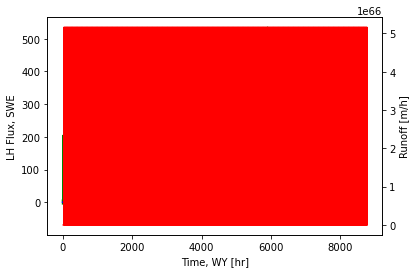

--- 7.220989227294922 seconds ---


In [87]:
## load PFCLM output and make plots / do anaylsis

from parflow.tools.fs import get_absolute_path
from parflowio.pyParflowio import PFData
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import xarray as xr
import time

start_time = time.time()

# intialize data and time arrays
#data    = np.zeros([8,8760])
#time    = np.zeros([8760])

# reading the CLM file PFCLM_SC.out.clm_output.<file number>.C.pfb
# variables are by layer:
# 0  total latent heat flux (Wm-2)
# 1  total upward LW radiation (Wm-2)
# 2  total sensible heat flux (Wm-2)
# 3  ground heat flux (Wm-2)
# 4  net veg. evaporation and transpiration and soil evaporation (mms-1)
# 5  ground evaporation (mms-1)
# 6  soil evaporation (mms-1)
# 7  vegetation evaporation (canopy) and transpiration (mms-1)
# 8  transpiration (mms-1)
# 9  infiltration flux (mms-1)
# 10 SWE (mm)
# 11 ground temperature (K)
# 12 irrigation flux
# 13 - 24 Soil temperature by layer (K)

slope    = 0.05
mannings = 2.e-6

path='/Users/reed/Projects/ParFlow_example_cases/single_column_CLM/output/'

file_in = path+"PFCLM_SC.out.static.nc"
print(file_in)
pf_static_out = xr.open_dataset(file_in)

file_in = path+"PFCLM_SC.out.0*.nc"
print(file_in)
pf_out = xr.open_mfdataset(file_in)

file_in = path+"PFCLM_SC.out.CLM.*.nc"
print(file_in)
clm_out = xr.open_mfdataset(file_in)
#clm_out = nc.Dataset(file_in)
print(clm_out)
#print(pf_static_out)
#print(pf_out)

#fig, ax = plt.subplots()
#ax.plot(clm_out['time'][:], clm_out['eflx_lh_tot'][:,0,0])

#plt.show()
#clm_in['eflx_lh_tot'][:]
# Plot LH Flux, SWE and Runoff
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(clm_out['time'][:],clm_out['eflx_lh_tot'][:,0,0], color='g')
ax.plot(clm_out['time'][:],clm_out['swe_out'][:,0,0], color='b')
ax2.plot(pf_out['time'][:],(np.sqrt(slope)/mannings)*np.maximum(pf_out['pressure'][:,19,0,0],0.0)**(5.0/3.0), color='r')
ax.set_xlabel('Time, WY [hr]')
ax.set_ylabel('LH Flux, SWE')
ax2.set_ylabel('Runoff [m/h]')
plt.show()

print("--- %s seconds ---" % (time.time() - start_time))

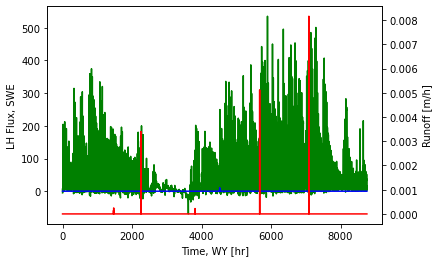

--- 6.1394569873809814 seconds ---


In [98]:
## load PFCLM output and make plots / do anaylsis


import parflow as pf
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import xarray as xr
import time as timer
from parflow.tools.fs import get_absolute_path

start_time = timer.time()

# intialize data and time arrays
data    = np.zeros([8,8760])
time    = np.zeros([8760])

#base1='/Users/reed/Projects/ParFlow_example_cases/'
path='/Users/reed/Projects/ParFlow_example_cases/single_column_CLM/output/'
#os.chdir(base1+'single_column_CLM')
#print(os.getcwd())
#dir_name = get_absolute_path('output')
#print(dir_name)
#preliminaries
#os.chdir('output')
#print(os.getcwd())
#print(get_absolute_path("PFCLM_SC.out.clm_output.00000.C.pfb"))

# reading the CLM file PFCLM_SC.out.clm_output.<file number>.C.pfb
# variables are by layer:
# 0  total latent heat flux (Wm-2)
# 1  total upward LW radiation (Wm-2)
# 2  total sensible heat flux (Wm-2)
# 3  ground heat flux (Wm-2)
# 4  net veg. evaporation and transpiration and soil evaporation (mms-1)
# 5  ground evaporation (mms-1)
# 6  soil evaporation (mms-1)
# 7  vegetation evaporation (canopy) and transpiration (mms-1)
# 8  transpiration (mms-1)
# 9  infiltration flux (mms-1)
# 10 SWE (mm)
# 11 ground temperature (K)
# 12 irrigation flux
# 13 - 24 Soil temperature by layer (K)

slope    = 0.05
mannings = 2.e-6
# loop over a year of files (8760 hours) and load in the CLM output
# then map specific variables to the data array which holds things for analysis
# and plotting
for icount in range(1, 8760):
    base = path+"PFCLM_SC.out.clm_output.{:05d}.C.pfb"
    filename = base.format(icount)
    #print(filename)
    CLM_data = pf.read_pfb(filename)
    #CLM.loadHeader()
    #CLM.loadData()
    #CLM_data = CLM.viewDataArray()
    #print(f'Dimensions of output file: {CLM_data.shape}')
    #print(CLM_data)
    #data_obj = PFData(filename)
    #data_obj.loadHeader()
    #data_obj.loadData()
    #data_arr = data_obj.getDataAsArray()
    #data_obj.close()
    data[1,icount] = CLM_data[0,0,0]  #total (really, it is net) latent heat flux (Wm-2)
    data[2,icount] = CLM_data[4,0,0]  #net veg. evaporation and transpiration and soil evaporation (mms-1)
    data[3,icount] = CLM_data[10,0,0] #SWE (mm)
    base = path+"PFCLM_SC.out.press.{:05d}.pfb"
    filename = base.format(icount)
    data_arr = pf.read_pfb(filename)    
    data[4,icount] = (np.sqrt(slope)/mannings) * np.maximum(data_arr[19,0,0],0.0)**(5.0/3.0)
    time[icount] = icount

#taylor_files = glob('./taylor_pressure/*.pfb')

# Plot LH Flux, SWE and Runoff
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(time[1:8760],data[1,1:8760], color='g')
ax.plot(time[1:8760],data[3,1:8760], color='b')
ax2.plot(time[1:8760],data[4,1:8760], color='r')
ax.set_xlabel('Time, WY [hr]')
ax.set_ylabel('LH Flux, SWE')
ax2.set_ylabel('Runoff [m/h]')
plt.show()

print("--- %s seconds ---" % (timer.time() - start_time))

In [2]:
## load PFCLM output and make plots / do anaylsis

from parflow.tools.fs import get_absolute_path
import parflow as pf
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import xarray as xr
import time as timer
import pandas as pd
import dask
dask.config.set(scheduler='single-threaded')

start_time = timer.time()

# intialize data and time arrays
data    = np.zeros([8,8760])
time    = np.zeros([8760])

# reading the CLM file PFCLM_SC.out.clm_output.<file number>.C.pfb
# variables are by layer:
# 0  total latent heat flux (Wm-2)
# 1  total upward LW radiation (Wm-2)
# 2  total sensible heat flux (Wm-2)
# 3  ground heat flux (Wm-2)
# 4  net veg. evaporation and transpiration and soil evaporation (mms-1)
# 5  ground evaporation (mms-1)
# 6  soil evaporation (mms-1)
# 7  vegetation evaporation (canopy) and transpiration (mms-1)
# 8  transpiration (mms-1)
# 9  infiltration flux (mms-1)
# 10 SWE (mm)
# 11 ground temperature (K)
# 12 irrigation flux
# 13 - 24 Soil temperature by layer (K)
path='/Users/reed/Projects/ParFlow_example_cases/single_column_CLM/output/'

#print(path+"PFCLM_SC.out.pfmetadata")
pfout = xr.open_dataset(path+"PFCLM_SC.out.fake.pfmetadata")
print(pfout)

slope    = 0.05
mannings = 2.e-6

#print(np.shape(pfout['latent_heat_flux']))
#print(pfout['time'])
#print('----------')
#print(pfout.attrs)
#print(pfout['latent_heat_flux'])
#print(pfout['latent_heat_flux'].attrs)
#print(pfout.values)
#time_temp=pfout['time']
#pfout.plot.scatter(time_temp),y='latent_heat_flux')
#LH = pfout.to_dataframe('latent_heat_flux')
#print(df)
#fig, ax = plt.subplots()
#ax2 = ax.twinx()
#ax.plot(time_temp,pfout.sel('latent_heat_flux'), color='g')
#ax.plot(pfout['time'][:],pfout['swe_out'][:], color='b')
#ax2.plot(pfout['time'][:],(np.sqrt(slope)/mannings)*np.maximum(pfout['pressure'][:,19],0.0)**(5.0/3.0), color='r')
#ax.set_xlabel('Time, WY [hr]')
#ax.set_ylabel('LH Flux, SWE')
#ax2.set_ylabel('Runoff [m/h]')
#plt.show()

for icount in range(1, 8760):
    base = path+"PFCLM_SC.out.clm_output.{:05d}.C.pfb"
    filename = base.format(icount)
    #print(filename)
    PF_data_clm = xr.open_dataset(filename,name='clm')
    base = path+"PFCLM_SC.out.press.{:05d}.pfb"
    filename = base.format(icount)
    PF_data_press = xr.open_dataset(filename,name='pressure')
    #PF_data_clm.load()
    #PF_data_press.load()
    
    #print((PF_data_clm))

    #print((PF_data_press))
    #CLM.loadHeader()
    #CLM.loadData()
    #CLM_data = CLM.viewDataArray()
    #print(f'Dimensions of output file: {CLM_data.shape}')
    #print(CLM_data)
    #data_obj = PFData(filename)
    #data_obj.loadHeader()
    #data_obj.loadData()
    #data_arr = data_obj.getDataAsArray()
    #data_obj.close()
    data[1,icount] = PF_data_clm['clm'].isel(z=0)  #total (really, it is net) latent heat flux (Wm-2)
    data[2,icount] = PF_data_clm['clm'].isel(z=4)  #net veg. evaporation and transpiration and soil evaporation (mms-1)
    data[3,icount] = PF_data_clm['clm'].isel(z=10) #SWE (mm)
        
    data[4,icount] = (np.sqrt(slope)/mannings) * np.maximum(PF_data_press['pressure'].isel(z=19),0.0)**(5.0/3.0)
    time[icount] = icount


# Plot LH Flux, SWE and Runoff
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(time[1:8760],data[1,1:8760], color='g')
ax.plot(time[1:8760],data[3,1:8760], color='b')
ax2.plot(time[1:8760],data[4,1:8760], color='r')
ax.set_xlabel('Time, WY [hr]')
ax.set_ylabel('LH Flux, SWE')
ax2.set_ylabel('Runoff [m/h]')
plt.show()


#fig, ax = plt.subplots()
#ax2 = ax.twinx()
ax.plot(time[:],pfout['latent_heat_flux'], color='g')
#ax.plot(clm_out['time'][:],clm_out['swe_out'].isel(z=0), color='b')
#ax2.plot((np.sqrt(slope)/mannings)*np.maximum(pf_out['pressure'].isel(z=19),0.0)**(5.0/3.0), color='r')
#ax.set_xlabel('Time, WY [hr]')
#ax.set_ylabel('LH Flux, SWE')
#ax2.set_ylabel('Runoff [m/h]')
#plt.show()

print("--- %s seconds ---" % (timer.time() - start_time))

/Users/reed/miniforge3/lib/python3.9/site-packages/parflow/tools/pf_backend.py:281: UserWarning: 
            Reading CLM output is not officially supported,
            at this time. We'll try our best to load the data,
            but this may break in the future!
            
  warnings.warn("""


<xarray.Dataset>
Dimensions:                   (time: 8760, z: 20)
Dimensions without coordinates: time, z
Data variables: (12/19)
    pressure                  (time, z) float64 ...
    saturation                (time, z) float64 ...
    latent_heat_flux          (time) float64 ...
    outgoing_longwave         (time) float64 ...
    sensible_heat_flux        (time) float64 ...
    ground_heat_flux          (time) float64 ...
    ...                        ...
    t_ground                  (time) float64 ...
    permeability_x            (z) float64 ...
    permeability_y            (z) float64 ...
    permeability_z            (z) float64 ...
    porosity                  (z) float64 ...
    specific storage          (z) float64 ...
Attributes:
    pf_metadata_file:  /Users/reed/Projects/ParFlow_example_cases/single_colu...
    parflow_version:   v3.10.0-2-gb13945d8


KeyboardInterrupt: 

In [2]:
## load PFCLM output and make plots / do anaylsis

from parflow.tools.fs import get_absolute_path
import parflow as pf
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import xarray as xr
import time as timer
import pandas as pd
import dask
dask.config.set(scheduler='single-threaded')

start_time = timer.time()

# intialize data and time arrays
data    = np.zeros([8,8760])
time    = np.zeros([8760])

# reading the CLM file PFCLM_SC.out.clm_output.<file number>.C.pfb
# variables are by layer:
# 0  total latent heat flux (Wm-2)
# 1  total upward LW radiation (Wm-2)
# 2  total sensible heat flux (Wm-2)
# 3  ground heat flux (Wm-2)
# 4  net veg. evaporation and transpiration and soil evaporation (mms-1)
# 5  ground evaporation (mms-1)
# 6  soil evaporation (mms-1)
# 7  vegetation evaporation (canopy) and transpiration (mms-1)
# 8  transpiration (mms-1)
# 9  infiltration flux (mms-1)
# 10 SWE (mm)
# 11 ground temperature (K)
# 12 irrigation flux
# 13 - 24 Soil temperature by layer (K)
path='/Users/reed/Projects/ParFlow_example_cases/single_column_CLM/output/'

#print(path+"PFCLM_SC.out.pfmetadata")
pfout = xr.open_dataset(path+"PFCLM_SC.out.fake.pfmetadata")
print(pfout)

print(pfout['latent_heat_flux'])

slope    = 0.05
mannings = 2.e-6

#print(np.shape(pfout['latent_heat_flux']))
#print(pfout['time'])
#print('----------')
#print(pfout.attrs)
#print(pfout['latent_heat_flux'])
#print(pfout['latent_heat_flux'].attrs)
#print(pfout.values)
#time_temp=pfout['time']
#pfout.plot.scatter(time_temp),y='latent_heat_flux')
#LH = pfout.to_dataframe('latent_heat_flux')
#print(df)
#fig, ax = plt.subplots()
#ax2 = ax.twinx()
#ax.plot(time_temp,pfout.sel('latent_heat_flux'), color='g')
#ax.plot(pfout['time'][:],pfout['swe_out'][:], color='b')
#ax2.plot(pfout['time'][:],(np.sqrt(slope)/mannings)*np.maximum(pfout['pressure'][:,19],0.0)**(5.0/3.0), color='r')
#ax.set_xlabel('Time, WY [hr]')
#ax.set_ylabel('LH Flux, SWE')
#ax2.set_ylabel('Runoff [m/h]')
#plt.show()






pfout['latent_heat_flux'].plot()
#fig, ax = plt.subplots()
#ax2 = ax.twinx()
#ax.plot(time[:],pfout['latent_heat_flux'], color='g')
#ax.plot(clm_out['time'][:],clm_out['swe_out'].isel(z=0), color='b')
#ax2.plot((np.sqrt(slope)/mannings)*np.maximum(pf_out['pressure'].isel(z=19),0.0)**(5.0/3.0), color='r')
#ax.set_xlabel('Time, WY [hr]')
#ax.set_ylabel('LH Flux, SWE')
#ax2.set_ylabel('Runoff [m/h]')
#plt.show()

<xarray.Dataset>
Dimensions:                   (time: 8760, z: 20)
Dimensions without coordinates: time, z
Data variables: (12/19)
    pressure                  (time, z) float64 ...
    saturation                (time, z) float64 ...
    latent_heat_flux          (time) float64 ...
    outgoing_longwave         (time) float64 ...
    sensible_heat_flux        (time) float64 ...
    ground_heat_flux          (time) float64 ...
    ...                        ...
    t_ground                  (time) float64 ...
    permeability_x            (z) float64 ...
    permeability_y            (z) float64 ...
    permeability_z            (z) float64 ...
    porosity                  (z) float64 ...
    specific storage          (z) float64 ...
Attributes:
    pf_metadata_file:  /Users/reed/Projects/ParFlow_example_cases/single_colu...
    parflow_version:   v3.10.0-2-gb13945d8


KeyError: 'x'

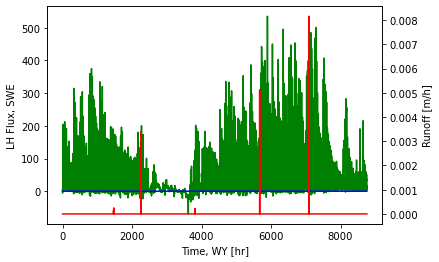

--- 3.6981611251831055 seconds ---


In [102]:
## load PFCLM output and make plots / do anaylsis


import parflow as pf
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import xarray as xr
import time as timer
from parflow.tools.fs import get_absolute_path
from glob import glob

start_time = timer.time()

# intialize data and time arrays
data    = np.zeros([8,8760])
time    = np.zeros([8760])

#base1='/Users/reed/Projects/ParFlow_example_cases/'
path='/Users/reed/Projects/ParFlow_example_cases/single_column_CLM/output/'
#os.chdir(base1+'single_column_CLM')
#print(os.getcwd())
#dir_name = get_absolute_path('output')
#print(dir_name)
#preliminaries
#os.chdir('output')
#print(os.getcwd())
#print(get_absolute_path("PFCLM_SC.out.clm_output.00000.C.pfb"))

# reading the CLM file PFCLM_SC.out.clm_output.<file number>.C.pfb
# variables are by layer:
# 0  total latent heat flux (Wm-2)
# 1  total upward LW radiation (Wm-2)
# 2  total sensible heat flux (Wm-2)
# 3  ground heat flux (Wm-2)
# 4  net veg. evaporation and transpiration and soil evaporation (mms-1)
# 5  ground evaporation (mms-1)
# 6  soil evaporation (mms-1)
# 7  vegetation evaporation (canopy) and transpiration (mms-1)
# 8  transpiration (mms-1)
# 9  infiltration flux (mms-1)
# 10 SWE (mm)
# 11 ground temperature (K)
# 12 irrigation flux
# 13 - 24 Soil temperature by layer (K)

slope    = 0.05
mannings = 2.e-6
# loop over a year of files (8760 hours) and load in the CLM output
# then map specific variables to the data array which holds things for analysis
# and plotting

files = glob(path+"PFCLM_SC.out.clm_output.*.C.pfb")
    #print(filename)
CLM_data = pf.read_pfb_sequence(files)
    #CLM.loadHeader()
    #CLM.loadData()
    #CLM_data = CLM.viewDataArray()
    #print(f'Dimensions of output file: {CLM_data.shape}')
    #print(CLM_data)
    #data_obj = PFData(filename)
    #data_obj.loadHeader()
    #data_obj.loadData()
    #data_arr = data_obj.getDataAsArray()
    #data_obj.close()
   # data[1,icount] = CLM_data[0,0,0]  #total (really, it is net) latent heat flux (Wm-2)
  #  data[2,icount] = CLM_data[4,0,0]  #net veg. evaporation and transpiration and soil evaporation (mms-1)
 #   data[3,icount] = CLM_data[10,0,0] #SWE (mm)

files = glob(path+"PFCLM_SC.out.press.*.pfb")
pf_data = pf.read_pfb_sequence(files)    
runoff = (np.sqrt(slope)/mannings) * np.maximum(pf_data[:,19,0,0],0.0)**(5.0/3.0)


#taylor_files = glob('./taylor_pressure/*.pfb')

# Plot LH Flux, SWE and Runoff
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(CLM_data[:,0,0,0], color='g')
ax.plot(CLM_data[:,4,0,0], color='b')
ax2.plot(runoff[:], color='r')
ax.set_xlabel('Time, WY [hr]')
ax.set_ylabel('LH Flux, SWE')
ax2.set_ylabel('Runoff [m/h]')
plt.show()

print("--- %s seconds ---" % (timer.time() - start_time))